In [ ]:
from AlgorithmImports import *

class MACDCrossoverStrategy(QCAlgorithm):
    def Initialize(self):
        self.SetStartDate(2020, 1, 1)
        self.SetEndDate(2021, 1, 1)
        self.SetCash(100000)
        self.symbol = self.AddEquity("GOOG", Resolution.Daily).Symbol        
        self.macd = self.MACD(self.symbol, 12, 26, 9, MovingAverageType.Exponential, Resolution.Daily)
        self.invested = False

    def OnData(self, data):
        if not self.macd.IsReady:
            return
        
        macd_value = self.macd.Current.Value
        signal_value = self.macd.Signal.Current.Value
        
        if macd_value > signal_value and not self.invested:
            self.SetHoldings(self.symbol, 1)  
            self.invested = True
            self.Debug(f"Bought {self.symbol} at {self.Securities[self.symbol].Price}, MACD: {macd_value}, Signal: {signal_value}")
        
        elif macd_value < signal_value and self.invested:
            self.Liquidate(self.symbol)
            self.invested = False
            self.Debug(f"Sold {self.symbol} at {self.Securities[self.symbol].Price}, MACD: {macd_value}, Signal: {signal_value}")

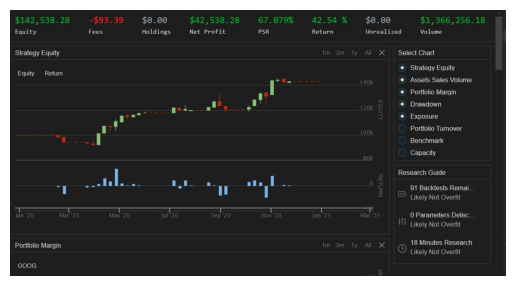

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "C:/Users/meets/QUANT/CODE/QUANTCONNECT/MACD.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()